Reference : https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/



                              "PREDICTION SYSTEM ON ELECTRICITY CONSUMPTION USING WEBSITE-BASED LSTM ALGORITHM"

Here, the problem of using electrical energy in households will be resolved, where a deep learning model will be made to predict the use of electrical energy every 1 hour for a day and find out how long the remaining electric pulses will run out.

### **The following is a description and explanation of the dataset**

- In a dataset, there is data on electricity consumption, namely train data and testing data.
- train data: data that will be used for deep learning model training.
- test data: data to be used for testing and evaluating the model.
- **actual id**: contains column data regarding the actual data id which is unique
- **pemakaian_listrik**: contains column data of the user's electricity consumption every 1 hour.
- **tanggal**: contains column data from the date of use of electricity users
- **nomorserial**: contains the serial number value used to identify the smartmeter user device.


# **Steps for Making Deep Learning Models**

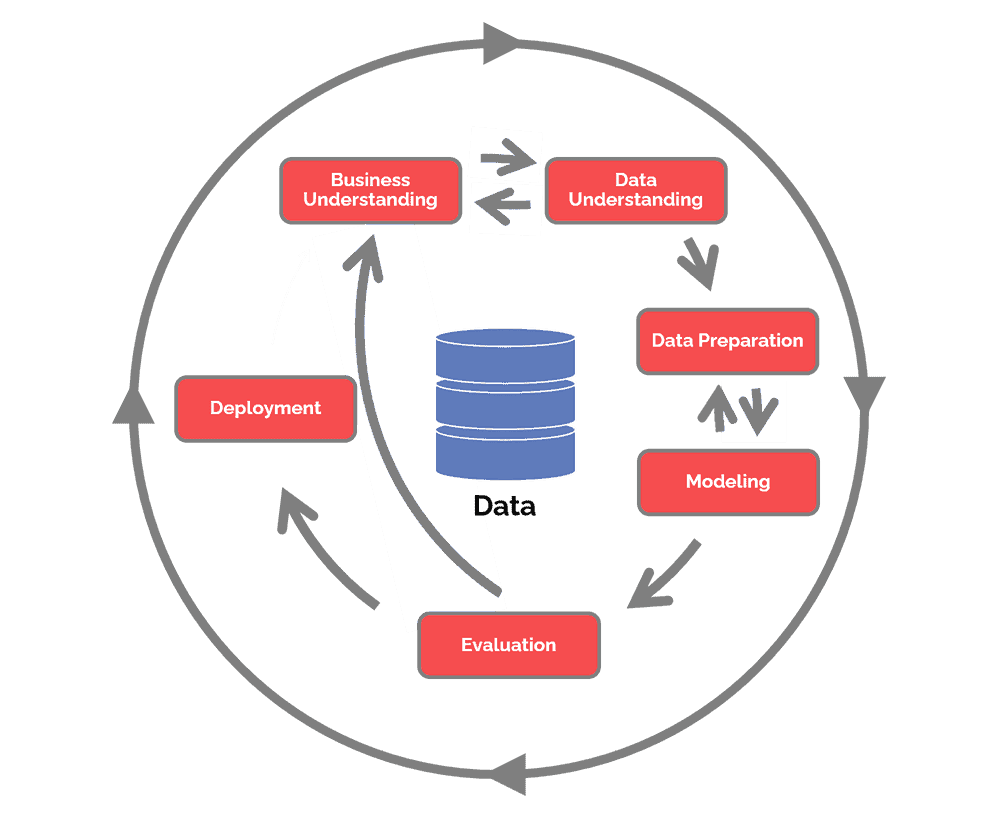

## **1. Business Understanding**

It will be impossible to solve the problem if we don't know what the problem is

(Akan sangat tidak mungkin untuk menyelesaikan masalah apabila kita tidak mengetahui apa permasalahan yang ada)

* Define the problem to be solved

* Focus on the main problem

* Collaborate with the people concerned with the project and make sure to stay connected with each other

* Take a step back and see the whole situation in context

**Sample Question:**

- What is the problem?

- Can it be solved with data? If so, what data?

- Where's the data? Does it exist, or do you need to collect it?

- Do you use personal data that someone has to give you, or data that is publicly available?

- What are the limitations for your project?

**Answers:**

1. The existence of technological changes can affect modern lifestyles which can lead to increased electricity consumption
In addition, user negligence in monitoring electricity consumption
can also affect the increase in electrical energy
with the increasing use of electrical energy in a sustainable manner, will result in a global energy shortage in the near future.

2. From these problems, it will be solved by using data on electricity usage of users per hour. With this data, it can be analyzed in the future.

3. The electrical energy consumption dataset can be obtained from the manual shooting process and the image recognition process on the kwh meter screen.

4. the data used is personal for this research

5. Limitations : 
               - Data collection was carried out in one place, namely one of the charms of Bali housing, Dayeuhkolot, Bandung Regency.
               - Prediction results, the maximum is done for the next 1 day with an interval of 1 hour.
               - Prediction system for electricity consumption built based on the website.

## **2. Data Understanding**

Data understanding provides an overview of (memberikan gambaran):

1. strength of data lack and limitation of data usage
2. the level of suitability of the data with the business problem to be solved
3. data availability (open/closed, access fees, etc.)

**- Data train and Data test** :the data is obtained from taking pictures and calculating electricity consumption manually by subtracting the remaining electric pulses from the previous time and the current time. the data amounted to 522 data collected.

### **A. Load Data**

In [ ]:
#LITERATUR OPTIMIZER 

#contoh sgd dan momentum => https://github.com/jsphbtst/linear-regression-optimization-technique (optimizer)
#source : https://www.youtube.com/watch?v=i4vGKgbtf1U

**1. import libraries**

In [ ]:
#manipulation data and visualization
import numpy as np #import numpy library for manipulation array and matrics
import pandas as pd #import pandas library for maniputation data like table and columns (Dataframe).
import matplotlib.pyplot as plt #to plotting image graph
plt.style.use('classic')

%matplotlib inline

#importing delay
import time
#tensorflow

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import seaborn as sns


**2. doing the process of retrieving data from google drive storage.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data into dataframe on data

df_data = pd.read_excel('/content/drive/MyDrive/TUGAS AKHIR/TUGAS AKHIR/PEMBUATAN ALAT TUGAS AKHIR/DATA/pemakaian listrik.xlsx')

In [ ]:
#show dataframe with 5 data from initial data

df_data.head(5)

,tanggal,pulsa_listrik,pemakaian_listrik
0,2022-01-29 20:02:34,163.04,NaN
1,2022-01-29 21:02:43,162.37,0.67
2,2022-01-29 22:02:52,161.89,0.48
3,2022-01-29 23:03:01,161.42,0.47
4,2022-01-30 00:03:10,160.96,0.46


### **B. Menelaah Data / review data** 

**What's the goal?**

- Reviewing the Data Used to get a complete picture of the data.

  Such as Descriptive Value => Mean, Median, Q1, Q2, Q3, Correlation and Others.

**1. Retrieve the required Data**

In [ ]:
#retrieve the data needed in analyzing the data.
#data required is only data_electricity_use and date

data_deskripsi = df_data[['pemakaian_listrik']]

**2. Show the data type in each column**

In [ ]:
#see the data type in the training data column
data_deskripsi.dtypes

pemakaian_listrik    float64
dtype: object

In [ ]:
#check data missing value
data_deskripsi.isna().sum()

pemakaian_listrik    8
dtype: int64

**3. Show Value of Statistical Description on data_deskripsi**

In [ ]:
#see statistical descriptions on data 

data_deskripsi.describe()

,pemakaian_listrik
count,514.000000
mean,0.424183
std,0.142045
min,0.150000
25%,0.320000
50%,0.410000
75%,0.500000
max,1.040000


**data_deskripsi**

- total data = 514 (only the existing data is taken. NaN is ignored)

- average electricity usage is around 0.42

- the minimum value of all data is 0.15

- max value of all data is 1.04

- the standard deviation (data distribution) is 0.140951

**4. View Total Column and Row data_deskripsi**

In [ ]:
#see the number of data columns and rows in data deskripsi

print(data_deskripsi.shape)
print(data_deskripsi.shape)

(522, 1)
(522, 1)


**5. Graphical form display to visually show data distribution on data_deskripsi**

- standar deviation   = standard deviation is a statistical value used to determine how close the data from a sample is to
- normal distribution = The normal distribution is a probability function that shows the distribution or spread of a variable.

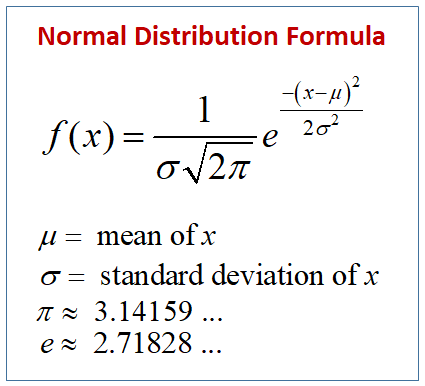

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


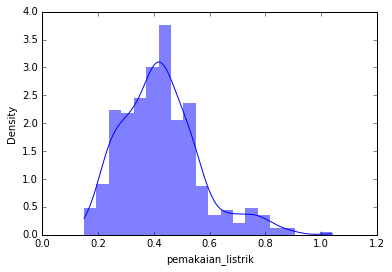

In [ ]:
#Seeing the distribution of electricity consumption by using a histplot (graph histogram) to visualize the distribution of the data.

#show histogram visualization on train data
sns.histplot(data_deskripsi['pemakaian_listrik'], kde=True, stat="density", linewidth=0);
ax = plt.axes()
ax.set_facecolor("white")

**7. Show IQR (Jangkauan Interquartile) on data_deskripsi**

In [ ]:
#IQR for data training

q1= data_deskripsi['pemakaian_listrik'].quantile(0.25)
q3 = data_deskripsi['pemakaian_listrik'].quantile(0.75)
iqr = round(q3 - q1, 2)

print(iqr)


0.18


**8. Show data_deskripsi outliers data with tukey's fences (1)**

In [ ]:
#handle warning
import warnings
warnings.filterwarnings('ignore')

#outlier filter (pencilan) on data 

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr



In [ ]:
print('the data of outliers : ')
print(data_deskripsi[(data_deskripsi['pemakaian_listrik'] < lower_bound) | (data_deskripsi['pemakaian_listrik'] > upper_bound)])

the data of outliers : 
     pemakaian_listrik
23                0.79
95                0.82
119               1.04
143               0.78
144               0.88
167               0.80
262               0.90
288               0.78
310               0.85
334               0.81
382               0.82
384               0.80
406               0.78
453               0.80
474               0.87


- From data_deskripsi have 15 Data Outlier

**Remember!**

- Each algorithm has different characteristics. such as the LSTM Algorithm, RNN based on Deep Learning can be used to overcome such outlier data without having to eliminate the data as in statistical rules.

**9. Display Boxpot Graph to see multiple quartile values ​​and also to see outliers in data_deskripsi**

Text(0.5, 1.0, 'visualization boxplot for see the data quartile, median')

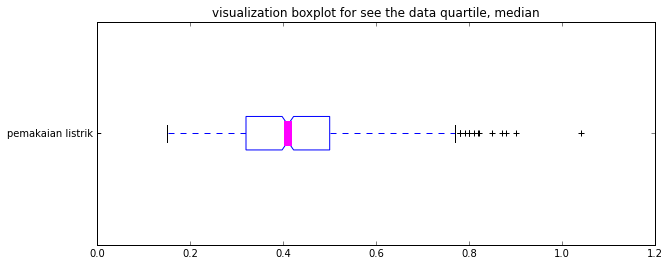

In [ ]:
#visualization for data training

#create plot for chart boxplot
fig = plt.figure(figsize =(10, 4)) 
ax = fig.add_subplot(111)

# Membuat instance sumbu dan mengganti data yang kosong NaN dengan nilai 0.
bp = ax.boxplot(data_deskripsi['pemakaian_listrik'].fillna(0), patch_artist = True,
                notch ='True', vert = 0)
    
for median in bp['medians']:
    median.set(color ='#FF00FF',
               linewidth = 8)
ax.set_yticklabels(['pemakaian listrik'])
# add title
plt.title("visualization boxplot for see the data quartile, median")

## **3. Data Preparation**

**What is Data Preparation?**

**Is it necessary?**

- Data Preparation : Memperbaiki / Improve Quality of the data for Model so that the performance of the data model is better.


Data Preparation Includes:

- Selecting the data to be used in the modeling process
- Cleaning data that has Missing Value
- Constructing Data
- Data Integration

### **A. Transforming into Timeseries**

In [ ]:
#copy the data

data = df_data.copy()

**Time Series**

- Timeseries: data that describes something from time to time or historical period. Time series data usually consists of a sequence of dates and values ​​in the data for which they are intended.

In [ ]:
#function transformation time series

def time_series(data_value):
  data_value["pemakaian_listrik"] = pd.to_numeric(data_value["pemakaian_listrik"], downcast="float") #mengconvert type data object to float
  data_value['tanggal'] = pd.to_datetime(data_value["tanggal"]) #mengconvert type data object to datetime
  return data_value


**Reformatted date**

- reformat the date on the data to make it clear that the intervals coincide every 1 hour.

In [ ]:
#function indexing dataframe on datetime

def reindex_date(data_value):
  
  data_value["pemakaian_listrik"] = pd.to_numeric(data_value["pemakaian_listrik"], downcast="float") #convert type data object to float
  data_value['tanggal'] = pd.to_datetime(data_value["tanggal"]) ##convert type data object to datetime

  data_value = data_value[['tanggal','pemakaian_listrik']] #just take 2 column.
  data_value = data_value.set_index('tanggal') #make index which was originally an integer to be a date time.

  #reformattted date
  
  lenght_data = len(data_value)
  tanggal_awal = data_value.index[0]
  data_value.index = pd.date_range(tanggal_awal, periods=lenght_data, freq='H')

  return data_value

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

#call function time series
data = time_series(data)

#call function reindex_date
data = reindex_date(data)

In [ ]:
data.head(100)

,pemakaian_listrik
2022-01-29 20:02:34,NaN
2022-01-29 21:02:34,0.67
2022-01-29 22:02:34,0.48
2022-01-29 23:02:34,0.47
2022-01-30 00:02:34,0.46
...,...
2022-02-02 19:02:34,0.82
2022-02-02 20:02:34,0.74
2022-02-02 21:02:34,0.50
2022-02-02 22:02:34,0.50


### **B. Clearing the Data**

**1. Check Data is there something missing or outlier? and What will the lost data be?**

- Missing data will be filled with the average value of the entire data.
- Cleaning data is used to minimize noise, eg data outlier.

In [ ]:
#fill data outlier with mean
data.loc[(data['pemakaian_listrik'] < lower_bound) | (data['pemakaian_listrik'] > upper_bound)] = np.nan

In [ ]:
#make function missing value for the data
def cleaning_missingValue(data_value):
    try:
      if data_value['pemakaian_listrik'].isna().sum() > 0 or (data_value['pemakaian_listrik'] == 0).sum() > 0:
        print("")
        print("Terdapat data yang kosong, mengisi data dengan rata-rata !")
        print("")
        time.sleep(1)
      
        #fill missing value and data zero with mean value in all data
        data_value['pemakaian_listrik'] = data_value['pemakaian_listrik'].fillna(data_value['pemakaian_listrik'].mean())
        data_value['pemakaian_listrik'] = data_value['pemakaian_listrik'].mask(data_value['pemakaian_listrik']==0).fillna(data_value['pemakaian_listrik'].mean())

        print("Data NULL berhasil ditambahkan !")
      else:
        print("")
        print("Selamat, tidak ada data yang kosong !")
      return round(data_value, 2)
    except:
      print('terjadi kesalahan pada data !!')

In [ ]:
#call fuction 
data = cleaning_missingValue(data)


Terdapat data yang kosong, mengisi data dengan rata-rata !

Data NULL berhasil ditambahkan !


In [ ]:
data.head(100)

,pemakaian_listrik
2022-01-29 20:02:34,0.41
2022-01-29 21:02:34,0.67
2022-01-29 22:02:34,0.48
2022-01-29 23:02:34,0.47
2022-01-30 00:02:34,0.46
...,...
2022-02-02 19:02:34,0.41
2022-02-02 20:02:34,0.74
2022-02-02 21:02:34,0.50
2022-02-02 22:02:34,0.50


## **4. Modeling Long Short-Term Memory**

**- Why Choose LSTM?**

1. From the amount of data. The data used is more than 500. Assume that the data is always growing continuously and the data will become very large. LSTM is very suitable for such a lot of data.

2. LSTM can handle sequential data such as time series and NLP.

3. LSTM can handle non-linear data types or there are outliers.

4. There is no need to assume the data is stationary or not. LSTM can handle both.

5. LSTM has a good performance in predicting electrical energy data such as this data.

### **A. Splitting Data**
- Data Train: data will taken for training model LSTM
- Test data:  data will be taken for model evaluation

In [ ]:
#Calculate data train and testing by percent
data_all = len(data)

#Estimate Data by %

persen_data_test = 20
persen_data_train = 80

jumlah_data_test  = int((persen_data_test/100) * data_all)
jumlah_data_train = data_all - jumlah_data_test

print("jumlah data testing dan train :", (jumlah_data_test, jumlah_data_train))

jumlah data testing dan train : (104, 418)


In [ ]:
#spliting data training

train = data[:-104]
test = data[-104:]

print("shape data training: " + str(train.shape))
print("shape data testing: " + str(test.shape))

shape data training: (418, 1)
shape data testing: (104, 1)


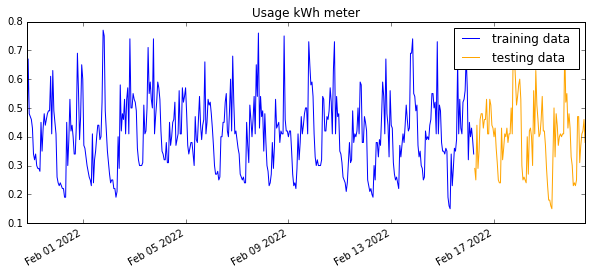

In [ ]:
#plot data training dan data testing

train['pemakaian_listrik'].plot(figsize=(10,4),legend=True)
test['pemakaian_listrik'].plot(figsize=(10,4),legend=True, color="orange")

plt.legend(['training data ', 'testing data'])
plt.title('Usage kWh meter')
plt.show()

### **B. Converting Data Into Sequence**

- where x1, x2, x3 is input for Deep Neural Network in LSTM
- where y1, y2, y3 is output (prediction) for Deep Neural Network in LSTM

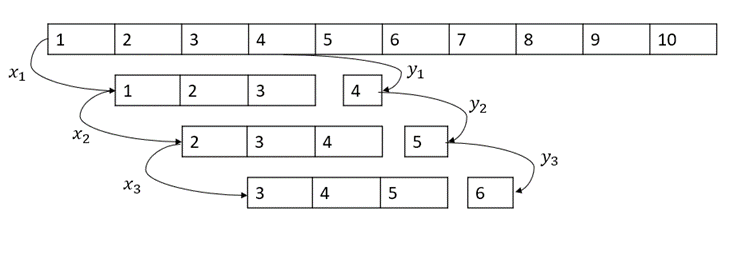

In [ ]:
#transform into a sequence function.
def sequence_data_transformasi(data, window_size):

  df_as_np = data.to_numpy()
  X = []
  y = []

  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
#Change to data sequence

WINDOW_SIZE = 7

#for train data
input_train, output_train = sequence_data_transformasi(round(train['pemakaian_listrik'], 2), WINDOW_SIZE)

#for test data
input_test, output_test = sequence_data_transformasi(round(test['pemakaian_listrik'], 2), WINDOW_SIZE)

print(input_train.shape, output_train.shape)
print(input_test.shape, output_test.shape)


(411, 7, 1) (411,)
(97, 7, 1) (97,)


### **C. Running Model LSTM**

**1. Estimasi Parameter Input Model LSTM**

In [ ]:
n_input = WINDOW_SIZE
n_output_label = 1

**2. Estimated Parameter Dense, Neuron, Dropout, Epoch, Batch Size, Learning Rate**


- Neuron = output dimension (dimensi keluaran) of neurons or Number of Neurons in Hidden Layer
- Dense = Number of Hidden Layers. Dense(1) is the output units of the hidden layer. If you give the dense function below that, then there are 2 hidden layers
- In the LSTM Layer there is 1 Hidden Layer.
- Epoch = When all data has gone through the training process on the Neural Network until it is returned to the beginning for one round (1 Epoch). because 1 epoch is too large to be entered into a computer, therefore we need to divide it into small units called batches. (karena pada 1 Epoch terlalu besar untuk dimasukkan kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil yang disebut batches.)

- Batch Size = Batch Size is the number of sample data distributed to the Neural Network. eg data 50, and batch size = 5. then the order of data to be entered into the neural network is [1,2,3,4,5], continue [6,7,8,9,10]

In [ ]:
"""

misalkan batch size pada data yang telah di transformasikan kedalam input sequential:

[1,2,3], [4,5,6], [7,8,9], ..... [98,99,100]

misalkan nilai batch size = 2 maka menjadi,

[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]
      batch ke-1            batch ke-2

"""



**Selecting Metric Loss**

1. Is the data a case of classification or regression?
2. What metrics are appropriate for this case?

In the Regression Case, the Error Metric which is suitable for Knowing the Performance of the Training and Evaluation Model will be used.

1. Mean Square Error (MSE)



```
      MSE = 1/n (ytrue - ypred)^2
```

In [ ]:
#Modeling data LSTM
model = Sequential([
    LSTM(8, activation='relu', input_shape=(n_input, n_output_label)),
    Dense(1),                                      
])

#call model and training data
#loss MSE is for the error function, the optimizer is to lower the value of the error (sgd)

model.compile(loss=['mse'], optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.010,
))
print(model.summary())

#1 epochs = 1x all training data from top to bottom to completion. #fit generator to execute the model.
history = model.fit(input_train, output_train, validation_data=(input_test, output_test), batch_size=1, epochs=150)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 8)                 320       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
411/411 [==============================] - 2s 4ms/step - loss: 0.0214 - val_loss: 0.0121
Epoch 2/150
411/411 [==============================] - 1s 3ms/step - loss: 0.0126 - val_loss: 0.0116
Epoch 3/150
411/411 [==============================] - 1s 3ms/step - loss: 0.0123 - val_loss: 0.0114
Epoch 4/150
411/411 [==============================] - 1s 3ms/step - loss: 0.0120 - val_loss: 0.0111
Epoch 5/150
411/411 [=====================

## **5. Model Evaluation**

- Data evaluation using data test

### **A. Performance Model**

- The model is said to be not overfitting and underfitting if the error value in the test data / validation data is not much different from the error in the training data.


**Overfitting :** where the prediction results on the training data are good and when tested with original data, the results are bad

**Underfitting :** where the prediction results on the training data and testing data are very bad.

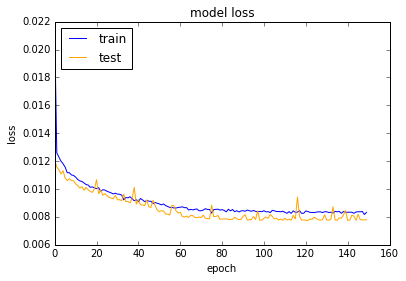

In [ ]:
#make ploting loss function MSE

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color="orange")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('error_pengujian_input_ke_4.png')
plt.show()

### **E. Show Prediction Graph on Training**

**1. prediction for training data and transformed into dataframe**

In [ ]:
train_prediction = model.predict(input_train).flatten()
train_hasil= pd.DataFrame(data={'predict':train_prediction, 'train':output_train})
train_hasil.tail(5)

,predict,train
406,0.397807,0.45
407,0.393164,0.40
408,0.360862,0.43
409,0.372382,0.39
410,0.367901,0.34


**2. Show the predicted results of train data in the form of a visualization graph**

Error MSE Data Training is:
411/411 [==============================] - 1s 2ms/step - loss: 0.0081
0.00814694631844759



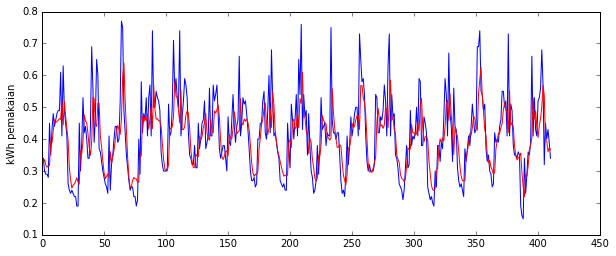

In [ ]:
#grafik prediksi for data training
#model.evaluate to show final error by data. model.evalute error with MSE is same sklearn MSE 
print("Error MSE Data Training is:")
print(model.evaluate(input_train, output_train, batch_size=1,))
print("")

plt.figure(figsize=(10, 4))
plt.plot(train_hasil['train'],label='train', color='blue')
plt.plot(train_hasil['predict'], label='predict', color='red')
plt.ylabel("kWh pemakaian")
plt.xticks()
plt.yticks()
plt.savefig('prediksi_train_pengujian_input_ke_4.png')
plt.show()


In [ ]:
#testing prediction

test_prediction = model.predict(input_test).flatten()
test_hasil = pd.DataFrame(data={'predict':test_prediction, 'actual':output_test})
test_hasil.head(5)

,predict,actual
0,0.459802,0.48
1,0.473243,0.43
2,0.450962,0.46
3,0.453417,0.46
4,0.442228,0.53


Error MSE Data Testing is : 0.007797059



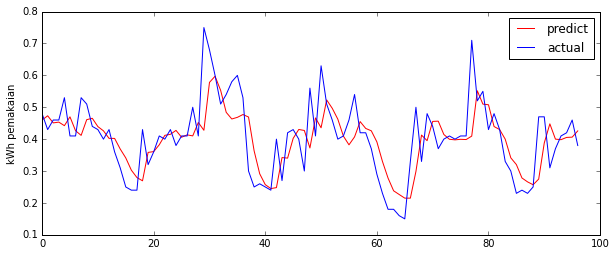

In [ ]:
#prediction graph for data testing

print('Error MSE Data Testing is :', mse(test_hasil['actual'], test_hasil['predict']))
print("")

plt.figure(figsize=(10, 4))
plt.plot(test_hasil['predict'], label='predict', color='red')
plt.plot(test_hasil['actual'],label='actual', color='blue')
plt.ylabel("kWh pemakaian")
plt.xticks()
plt.yticks()
plt.legend()
plt.savefig('prediksi_test_pengujian_input_ke_4.png')
plt.show()

In [ ]:
#or using function model.evaluate is simple. the result is same in the top
model.evaluate(input_test, output_test, batch_size=1)

97/97 [==============================] - 0s 2ms/step - loss: 0.0078


0.007797058671712875

## **6. Model Save**


In [ ]:
model.save('model_pengujian_input_ke_4.h5')